In [1]:
import os
from game_simulation1 import *
import matplotlib.pyplot as plt

### (k+1) SA_EA with Features B

In [12]:
def sa_esk(iterations,num_games,k,tau):
      W = [(np.zeros(21),100 * np.ones(21), simulation(np.zeros(21),0,3)) for i in range(k)]

      learning_curve =[]
      std=[]

      for t in range(iterations):
        if t%5==0:
           Wp = []
           for i in range(k):
               wp,Sigmap,scorep = W[i]
               scorep = simulation(wp,0,3)
               Wp.append((wp,Sigmap,scorep))
           W=Wp
        w,Sigma,score = W[np.random.randint(0, k)]
        new_Sigma = Sigma * np.exp(tau * np.random.normal(loc=[0]*len(w), scale=np.sqrt([1]*len(w))))
        new_w = w+new_Sigma*np.random.normal(loc=[0]*len(w), scale=np.sqrt([1]*len(w)))
        new_score  = simulation(new_w,0,3)
        W.append((new_w,new_Sigma,new_score))
        W.sort(reverse=True, key=lambda x: x[2])
        W = W[:k]
        game_scores = [simulation(W[0][0],0,3) for _ in range(num_games)]
        learning_curve.append(np.mean(game_scores))

        if t%20 ==0:
          # print("Iteration {}: Average score of best samples: {},{}".format(t+1, simulation2(W[0][0]),W[0][2]))
          print("Iteration {}: Average score of best samples: {}".format(t+1,W[0][2]))
      return learning_curve,std,W

In [13]:
np.random.seed(42)
learning_curve_sa_es,std_WN,W=sa_esk(740,1,5,tau=0.1)

Iteration 1: Average score of best samples: 0.3333333333333333
Iteration 21: Average score of best samples: 1.0
Iteration 41: Average score of best samples: 1.3333333333333333
Iteration 61: Average score of best samples: 3.0
Iteration 81: Average score of best samples: 18.333333333333336
Iteration 101: Average score of best samples: 45.33333333333333
Iteration 121: Average score of best samples: 68.66666666666666
Iteration 141: Average score of best samples: 71.33333333333334
Iteration 161: Average score of best samples: 76.66666666666667
Iteration 181: Average score of best samples: 64.33333333333333
Iteration 201: Average score of best samples: 58.666666666666664
Iteration 221: Average score of best samples: 134.66666666666666
Iteration 241: Average score of best samples: 56.666666666666664
Iteration 261: Average score of best samples: 62.66666666666666
Iteration 281: Average score of best samples: 114.66666666666667
Iteration 301: Average score of best samples: 145.0
Iteration 321: 

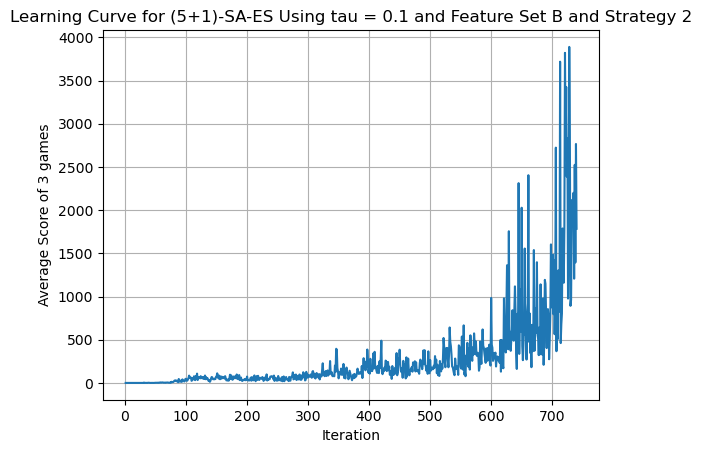

<Figure size 640x480 with 0 Axes>

In [16]:
plt.plot(range(1, 740 + 1), learning_curve_sa_es, '-', label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel(f'Average Score of 3 games')
plt.title('Learning Curve for (5+1)-SA-ES Using tau = 0.1 and Feature Set B and Strategy 2')
plt.grid(True)
plt.show()
plt.savefig('learning_curve_5p1_SAES_B_Strategy2.png', dpi=300, bbox_inches='tight')